# Библиотеки

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
import time
import pandas as pd
import numpy as np
from tqdm import tqdm
import data_loader
import model_evaluation
import plotting_utils
import model_training

In [2]:
# run this function if you need to generate a csv data set from scratch
#data_loader.generate_csv_dataset()

In [2]:
X, y, ID = data_loader.load_dataset()

data loaded in 0.05054831504821777ms
          0         1         2         3         4         5         6  \
0  0.303588 -0.523626 -0.651190 -1.467650 -0.572507 -0.280386 -1.388246   
1 -0.484031 -0.262126  0.091142 -1.006777 -0.035807 -0.231770 -0.857022   
2 -0.957440  0.698818 -0.176248 -0.617123 -0.010873  0.925743  0.071460   
3  0.902663 -1.304844 -0.068376 -1.963072 -0.379324 -0.518108 -1.383540   
4  0.506352 -1.478475 -0.688782 -1.687141 -0.489462 -0.443938 -1.347390   

          7         8         9  ...        70        71        72        73  \
0 -0.950745 -2.033666  0.623800  ...  0.116454  1.707008  0.930117  0.145040   
1 -0.493470 -1.053105  0.319601  ...  2.131210  1.565413  0.606471  0.574687   
2 -0.362686 -0.772299  0.671955  ...  0.986818  1.921790  1.916645  2.079151   
3 -0.763318 -2.130993  0.063363  ... -0.442807 -0.534647  0.323451  0.133644   
4 -0.153102 -1.409550  0.290466  ... -0.621059  0.381151  0.202425 -0.084719   

         74        75        76

In [4]:
ID['0'].unique()    # actors

array([22,  9, 18,  6, 24,  3, 21, 12, 14, 15,  5, 20, 23,  4,  8, 13, 11,
       10,  7,  2, 19,  1, 17, 16])

In [3]:
group_members= data_loader.get_k_fold_group_member()


X_k_folds, y_k_folds = data_loader.get_custom_k_folds(X, y, ID, group_members)
print(len(X_k_folds))

5


## SVM with RBF kernel

In [35]:
C = [0.01, 0.05, 0.1, 1.0, 10, 100]
gamma = [100, 10, 1, 0.1, 0.01, 0.001]
UAR_list = []
UAR_best = 0
for val_C in C:
    for val_gamma in gamma:
        model = SVC(kernel = 'rbf', C=val_C, gamma=val_gamma)
        UAR,y_pr,y_tr,y_te = model_training.estimate_model(model, X_k_folds, y_k_folds)
        if UAR_best<UAR:
            UAR_best,y_pred,y_true,y_test = UAR,y_pr,y_tr,y_te
        UAR_list.append(UAR)

 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.97it/s]

UAR = 0.125


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.50it/s]

UAR = 0.242


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.38it/s]

UAR = 0.125


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.87it/s]

UAR = 0.127


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.74it/s]

UAR = 0.354


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  6.52it/s]

UAR = 0.309


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.96it/s]

UAR = 0.125


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.18it/s]

UAR = 0.242


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.59it/s]

UAR = 0.125


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.56it/s]

UAR = 0.127


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.63it/s]

UAR = 0.354


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  6.25it/s]

UAR = 0.309


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.86it/s]

UAR = 0.125


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.96it/s]

UAR = 0.242


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.28it/s]

UAR = 0.125


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.83it/s]

UAR = 0.127


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.80it/s]

UAR = 0.367


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  6.12it/s]

UAR = 0.309


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.88it/s]

UAR = 0.125


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  8.84it/s]

UAR = 0.125


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  8.16it/s]

UAR = 0.125


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 12.26it/s]

UAR = 0.210


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 11.27it/s]

UAR = 0.437


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  6.18it/s]

UAR = 0.383


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.61it/s]

UAR = 0.125


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  8.68it/s]

UAR = 0.125


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  7.96it/s]

UAR = 0.125


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 10.71it/s]

UAR = 0.218


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 13.77it/s]

UAR = 0.445


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  6.40it/s]

UAR = 0.460


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.49it/s]

UAR = 0.125


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  8.65it/s]

UAR = 0.125


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  8.21it/s]

UAR = 0.125


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.75it/s]

UAR = 0.218


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 12.46it/s]

UAR = 0.438


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 12.22it/s]

UAR = 0.437


In [33]:
print(UAR_best)

0.46158854166666674


## Results and confusion matrix

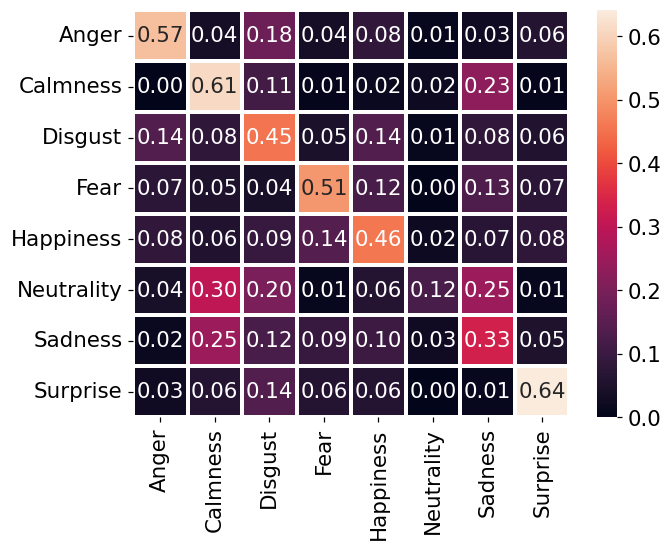

Saving confusion matrix with name:  Doc/figures/confusion_matrix_eng.jpg


In [34]:
plotting_utils.plot_confusion_matrix_eng(y_test, y_true, y_pred)

# SVM (version 2)

In [4]:
C = [0.01, 0.05, 0.1, 1.0, 10, 100]
gamma = [100, 10, 1, 0.1, 0.01, 0.001]
UAR_list = []
UAR_best = 0
C_best, gamma_best = 0,0
for val_C in C:
    for val_gamma in gamma:
        model = SVC(kernel = 'rbf', C=val_C, gamma=val_gamma, decision_function_shape='ovr',break_ties=True)
        UAR,y_pr,y_tr,y_te = model_training.estimate_model(model, X_k_folds, y_k_folds)
        if UAR_best<UAR:
            UAR_best,y_pred,y_true,y_test = UAR,y_pr,y_tr,y_te
            C_best, gamma_best = val_C,val_gamma
            print(f'C = {val_C:.3f}, gamma = {val_gamma:.3f}')
        UAR_list.append(UAR)

100%|██████████| 5/5 [00:02<00:00,  2.19it/s]


UAR = 0.125
C = 0.010, gamma = 100.000


100%|██████████| 5/5 [00:02<00:00,  2.41it/s]


UAR = 0.246
C = 0.010, gamma = 10.000


100%|██████████| 5/5 [00:01<00:00,  3.00it/s]


UAR = 0.125


100%|██████████| 5/5 [00:01<00:00,  3.17it/s]


UAR = 0.128


100%|██████████| 5/5 [00:01<00:00,  3.43it/s]


UAR = 0.354
C = 0.010, gamma = 0.010


100%|██████████| 5/5 [00:01<00:00,  3.34it/s]


UAR = 0.310


100%|██████████| 5/5 [00:02<00:00,  2.29it/s]


UAR = 0.125


100%|██████████| 5/5 [00:02<00:00,  2.27it/s]


UAR = 0.246


100%|██████████| 5/5 [00:01<00:00,  2.91it/s]


UAR = 0.125


100%|██████████| 5/5 [00:01<00:00,  3.28it/s]


UAR = 0.128


100%|██████████| 5/5 [00:01<00:00,  3.23it/s]


UAR = 0.355
C = 0.050, gamma = 0.010


100%|██████████| 5/5 [00:01<00:00,  3.32it/s]


UAR = 0.310


100%|██████████| 5/5 [00:02<00:00,  2.31it/s]


UAR = 0.125


100%|██████████| 5/5 [00:02<00:00,  2.35it/s]


UAR = 0.246


100%|██████████| 5/5 [00:01<00:00,  2.86it/s]


UAR = 0.125


100%|██████████| 5/5 [00:01<00:00,  3.13it/s]


UAR = 0.128


100%|██████████| 5/5 [00:01<00:00,  3.30it/s]


UAR = 0.368
C = 0.100, gamma = 0.010


100%|██████████| 5/5 [00:01<00:00,  3.28it/s]


UAR = 0.311


100%|██████████| 5/5 [00:02<00:00,  2.31it/s]


UAR = 0.125


100%|██████████| 5/5 [00:02<00:00,  2.31it/s]


UAR = 0.125


100%|██████████| 5/5 [00:01<00:00,  2.88it/s]


UAR = 0.125


100%|██████████| 5/5 [00:01<00:00,  2.91it/s]


UAR = 0.209


100%|██████████| 5/5 [00:01<00:00,  4.05it/s]


UAR = 0.439
C = 1.000, gamma = 0.010


100%|██████████| 5/5 [00:01<00:00,  3.77it/s]


UAR = 0.380


100%|██████████| 5/5 [00:02<00:00,  2.25it/s]


UAR = 0.125


100%|██████████| 5/5 [00:02<00:00,  2.27it/s]


UAR = 0.125


100%|██████████| 5/5 [00:01<00:00,  2.66it/s]


UAR = 0.125


100%|██████████| 5/5 [00:01<00:00,  2.95it/s]


UAR = 0.217


100%|██████████| 5/5 [00:01<00:00,  3.67it/s]


UAR = 0.441
C = 10.000, gamma = 0.010


100%|██████████| 5/5 [00:01<00:00,  4.76it/s]


UAR = 0.462
C = 10.000, gamma = 0.001


100%|██████████| 5/5 [00:02<00:00,  2.42it/s]


UAR = 0.125


100%|██████████| 5/5 [00:02<00:00,  2.38it/s]


UAR = 0.125


100%|██████████| 5/5 [00:01<00:00,  2.74it/s]


UAR = 0.125


100%|██████████| 5/5 [00:01<00:00,  2.72it/s]


UAR = 0.217


100%|██████████| 5/5 [00:01<00:00,  3.36it/s]


UAR = 0.434


100%|██████████| 5/5 [00:01<00:00,  4.54it/s]

UAR = 0.441


In [5]:
print(UAR_best)

0.46158854166666674


## Results and confusion matrix

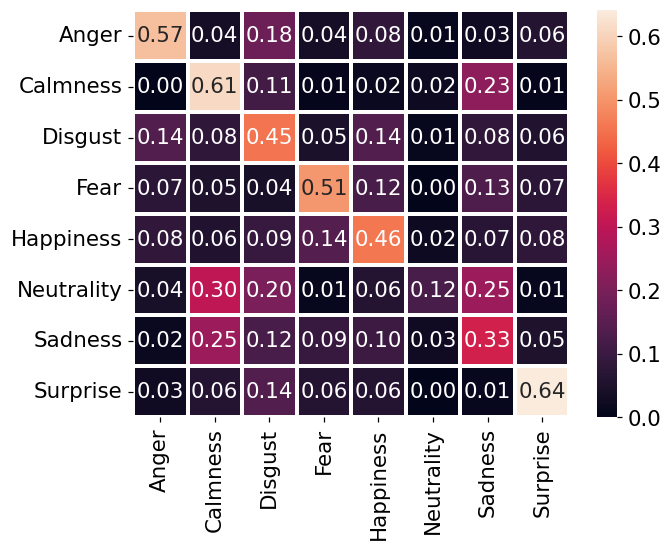

Saving confusion matrix with name:  Doc/figures/confusion_matrix_eng.jpg


In [38]:
plotting_utils.plot_confusion_matrix_eng(y_test, y_true, y_pred)